# Ejercicio
* Vamos a realizar un ejercicio relacionado con el uso de algoritmos de ML para estimar el precio de una vivienda de acuerdo a las características de un [dataset  de viviendas](https://www.kaggle.com/datasets/vedavyasv/usa-housing)
     * El dataset ha sido extraido de la plataforma Kaggle
* Para ello vamos a emplear un algoritmo muy habitual para este cometido como es la **regresion líneal** conocido como un método supervisado

## Apredizaje supervisado
* Visión general de los algoritmos supervisados 

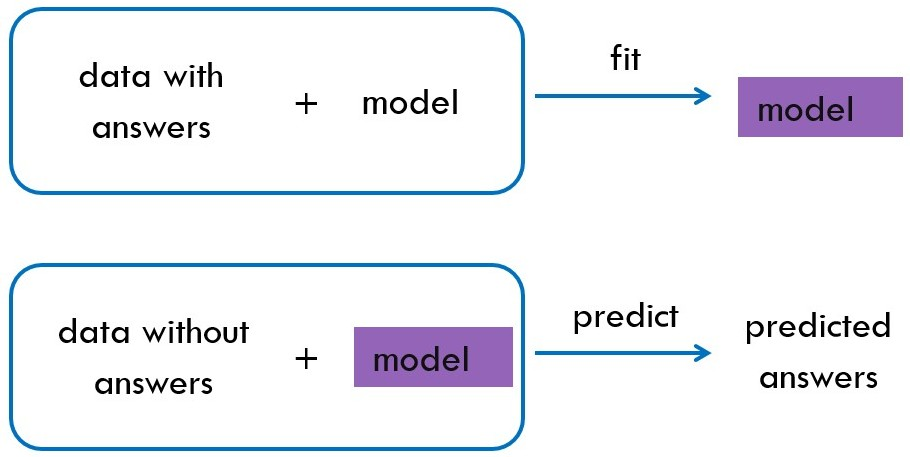

* Los algoritmos como **Regresión Lineal** permiten conocer respuestas numéricas (valores continuos) 
    * Ej: Predecir ingresos de un película
    



## Regresión lineal 
* Ajustar el modelo a una función matemática $y_\beta(x) = \beta_0+\beta_1 x+\epsilon$ que es una **recta**
   * Para el ejemplo $y_\beta$ representa los ingresos de taquilla y $x$ el presupuesto
   
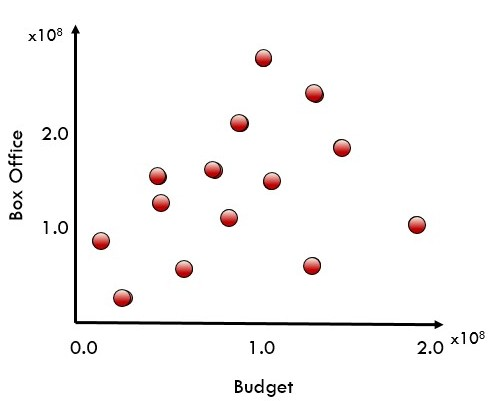

   * El ajuste linear depende de la minimización del error cometido $y_\beta(x_{obs}) - y_{obs}$
   * Existen múltiples métricas: error cuadrático medio (MSE), función de coste...
   
   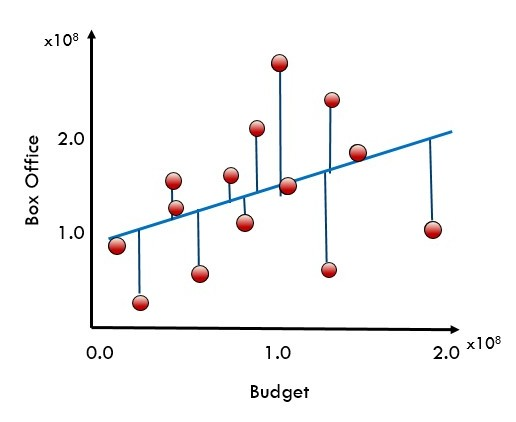

* La invocación del método de [regresión lineal se puede realizar haciendo uso de la librería scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

```
from sklearn.linear_model import LinearRegression

....
# Create an instance of the class​
LR = LinearRegression()​
# Fit the instance on the data and then predict the expected value​
LR = LR.fit(X_train, y_train)​
y_predict = LR.predict(X_test)

```

## Preparación del dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de datos
data = pd.read_csv('datasets/USA_Housing.csv') 

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
subdata = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]

In [7]:
subdata.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

In [8]:
x = subdata[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

In [9]:
from sklearn.model_selection import train_test_split

y = subdata['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [30]:
from sklearn.linear_model import LogisticRegression
import time


#########################################
#
# Insert unpatch code here
from sklearnex import unpatch_sklearn
unpatch_sklearn()
#
#########################################

start_time = time.time()
# Create an instance of the class
LR = LogisticRegression()
# Fit the instance on the data and then predict the expected value
LR = LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)
unpatched_time = time.time() - start_time
print("Time to calculate \033[1m knn.predict in UNpatched scikit-learn {:4.1f}\033[0m seconds".format(UNpatched_time))


Time to calculate  knn.predict in UNpatched scikit-learn  0.1 seconds


In [31]:
from sklearn.linear_model import LogisticRegression
import time


#########################################
#
# Insert unpatch code here
from sklearnex import patch_sklearn
patch_sklearn()
#
#########################################

start_time = time.time()
# Create an instance of the class
LR = LogisticRegression()
# Fit the instance on the data and then predict the expected value
LR = LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)
patched_time = time.time() - start_time
print("Time to calculate \033[1m knn.predict in patched scikit-learn {:4.1f}\033[0m seconds".format(UNpatched_time))


Time to calculate  knn.predict in patched scikit-learn  0.1 seconds


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


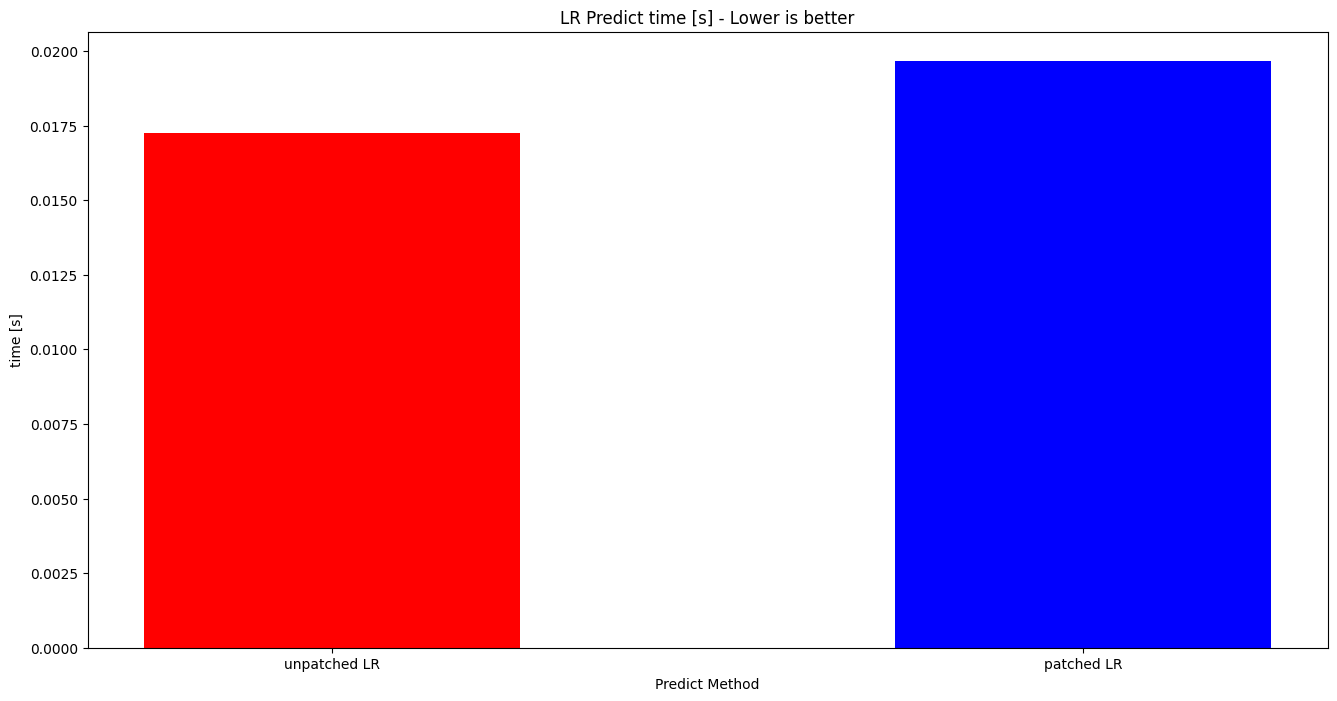

Intel(R) Extensions for scikit-learn* KNN acceleration  0.9 x!


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

left = [1,2]
pred_times = [unpatched_time, patched_time]
tick_label = ['unpatched LR', 'patched LR']
plt.figure(figsize = (16,8))
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['red', 'blue'])
plt.xlabel('Predict Method'); plt.ylabel('time [s]'); plt.title('LR Predict time [s] - Lower is better')
plt.show()

print('Intel(R) Extensions for scikit-learn* \033[1mKNN acceleration {:4.1f} x!\033[0m'.format( unpatched_time/patched_time))

In [27]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

LR = LogisticRegression()
LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)
LR.score(x_test, y_predict)


1.0